<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_06_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.36198848 0.1920749 ]
[0.36198848 0.1920749  0.11123631 0.0706903 ]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 1420 to 323
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 171.7 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 1208 to 417
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 57.2 MB
[0.00205429 0.00202532]
[124.12568315 123.24733696]
1.8359129428863525
time of 1 plot: 0.01633429527282715 seconds


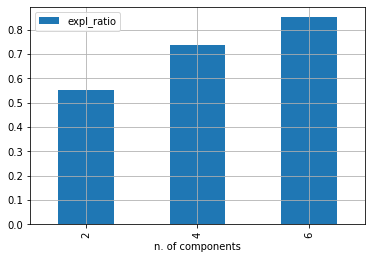

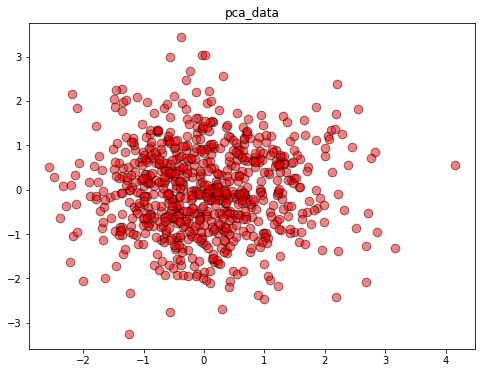

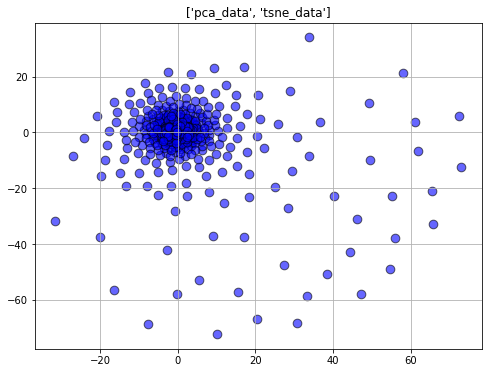

time of 1 plot: 0.015106201171875 seconds


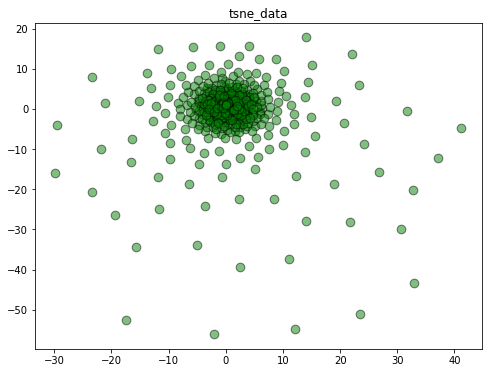

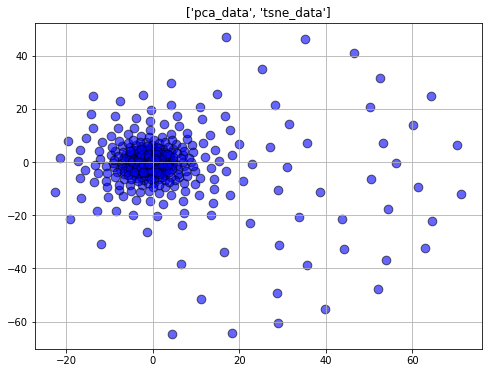

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 1. Dla danych z zadania z 05 wykonaj:
# PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
# utwórz wykres typu "słupkowego" dla wszystkich n_components_
# oblicz n_components_, które zachowają wariancję na poziomie 95%

def exc_1():

  seed = np.random.seed(62)

  wine = load_wine()
  X, y = wine.data, wine.target

  # StandardScaler
  scaler = StandardScaler().fit(X)
  X_std = scaler.transform(X)

  el = [2, 4, 6]
  el_sum = []

  for i in el:
      pca = PCA(n_components=i, random_state=seed)
      pca.fit(X_std)
      
      expl_ratio = pca.explained_variance_ratio_
      print(expl_ratio)
      
      expl_ratio_sum = sum(expl_ratio)
      el_sum.append(expl_ratio_sum)


  df_to_plot = pd.DataFrame(el_sum, index=el, columns=["expl_ratio"])
  df_to_plot.index.name = "n. of components"
  df_to_plot.plot(kind="bar", grid=True)

  pca = PCA(n_components=0.95, random_state=seed)
  x_reduced = pca.fit_transform(X)

  pca.n_components_

# 2. Dla datasetu z projektu:
# utwórz scatter plot, korzystając z:
# t-SNE*
# PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
# porównaj czas oraz "jakość" powyższych wykresów

def exc_2():

  train_data = pd.read_csv("/content/drive/MyDrive/Projekt_ML_26.06.2021/train_data.csv", header=None)
  test_data = pd.read_csv("/content/drive/MyDrive/Projekt_ML_26.06.2021/test_data.csv", header=None)

  train_data, train_data = train_test_split(train_data, test_size=0.6, shuffle=True, random_state=seed)
  test_data, test_data   = train_test_split(test_data, test_size=0.6, shuffle=True, random_state=seed)

  train_data.info()
  test_data.info()

  # Scaler
  scaler = StandardScaler().fit(test_data)
  data_std = scaler.transform(test_data)

  # PCA
  pca = PCA(n_components=2, whiten=True, random_state=seed)
  pca_data = pca.fit_transform(data_std)

  print(pca.explained_variance_ratio_)
  print(pca.singular_values_)

  # TSNE
  tsne = TSNE(n_components=2, random_state=seed)
  tsne_data = tsne.fit_transform(data_std)

  print(tsne.kl_divergence_)

  data_sets   = [pca_data, tsne_data]
  data_names  = ["pca_data", "tsne_data"]
  colors      = ["r", "g", "lb"]

  # PLOT
  for i, n, c in zip(data_sets, data_names, colors):
    plt.figure(figsize=(8, 6))
    start_time = time.time()
    plt.scatter(
        i[:, 0], i[:, 1],
        s=75, c=c,
        marker="o", 
        alpha=0.5,
        edgecolor="black"
    )
    end_time = time.time()
    plt.title(n)
    print(f"time of 1 plot: {end_time - start_time} seconds")

    # Pipeline
    pipe = Pipeline([("std", StandardScaler()), ("pca", PCA(n_components=0.95, random_state=seed)), ("tsne", TSNE(n_components=2, random_state=seed))])
    piped = pipe.fit_transform(test_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(piped[:, 0], piped[:, 1], s=75, c="b", marker="o", alpha=0.6, edgecolor="black")

    plt.title(data_names)
    plt.grid()
    plt.show()


# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator
def exc_3():

  train_data = pd.read_csv("/content/drive/MyDrive/Projekt_ML_26.06.2021/train_data.csv", header=None)
  test_data = pd.read_csv("/content/drive/MyDrive/Projekt_ML_26.06.2021/test_data.csv", header=None)

  train_labels = pd.read_csv("/content/drive/MyDrive/Projekt_ML_26.06.2021/train_labels.csv", header=None)

  yy = train_labels[0].values

  X_train, X_test, y_train, y_test = train_test_split(train_data, yy, test_size=0.95, shuffle=True, random_state=seed)

  scaler = StandardScaler().fit(X_train)
  X_train_std = scaler.transform(X_train)

  kpca = KernelPCA()
  svc_model = SVC()

  pipe = Pipeline(steps=[('kpca', kpca), ('svc_model', svc_model)])
  pipe.fit(X_train_std, y_train)

  param_dict = {"kpca__gamma": np.linspace(0.03, 0.05, 5),
                "kpca__kernel": ['linear', 'poly', 'rbf'],
                "svc_model__C": [0.1, 1, 10, 100, 1000],
                "svc_model__gamma": [1, 0.1, 0.01, 0.001, 0.0001]}


  grid = GridSearchCV(pipe, param_dict, verbose=0)
  grid.fit(X_train_std, y_train)

  grid.best_params_
  grid.best_score_

exc_1()
exc_2()
exc_3()